<a href="https://colab.research.google.com/github/fatoumahaidara/Natural-language-processing-coursework/blob/main/Copy_of_Natural_language_processing_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
The DrugLibTrain and DrugLibTest datasets, that consist of thorough user reviews of a variety of drugs, are used in this project. Through three primary textual fields—commentsReview, which captures general opinions about the drug; sideEffectsReview, which describes any negative reactions or side effects experienced; or benefitsReview, which emphasises the treatment's perceived efficacy or positive outcomes—each record offers insights into actual user experiences. Both datasets contain extra columns that can be used as target variables for multi-class classification tasks, such as numerical ratings and category labels (e.g., efficacy, satisfaction level).
These three columns were combined into a single composite variable called combined_text in order to improve the dataset's applicability for natural language processing (NLP) applications. By combining all pertinent comments into a single text input, this method helps models comprehend the general tone and context of each review. The NLP model is trained and refined using the DrugLibTrain dataset, and its performance and generalisation on new data are assessed using the DrugLibTest dataset.


#Load Datasets


In [14]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()

Saving drug_reviews_Test.csv to drug_reviews_Test (1).csv


In [15]:
uploaded = files.upload()

Saving drug_reviews_train.csv to drug_reviews_train (1).csv


In [16]:
df = pd.read_csv('/content/drug_reviews_train.csv', sep=',') #after getting the file to a format we can work with, we use pandas to read the data as a dataframe, specifying tab as the separator
print(df) #calling print allows us to view the dataframe

      Unnamed: 0       urlDrugName  rating           effectiveness  \
0           2202         enalapril       4        Highly Effective   
1           3117  ortho-tri-cyclen       1        Highly Effective   
2           1146           ponstel      10        Highly Effective   
3           3947          prilosec       3    Marginally Effective   
4           1951            lyrica       2    Marginally Effective   
...          ...               ...     ...                     ...   
3102        1039           vyvanse      10        Highly Effective   
3103        3281            zoloft       1             Ineffective   
3104        1664           climara       2    Marginally Effective   
3105        2621         trileptal       8  Considerably Effective   
3106        2748          micardis       4    Moderately Effective   

                        sideEffects                               condition  \
0                 Mild Side Effects  management of congestive heart failure   
1

In [17]:
file_path = '/content/drive/MyDrive/updated Drugs rewiewed/drug_reviews_train.csv'

try:
    with open(file_path, 'r') as f:
        for i in range(10): # Read and print the first 10 lines
            line = f.readline()
            print(line)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Error: File not found at /content/drive/MyDrive/updated Drugs rewiewed/drug_reviews_train.csv


The Google Drive file drug_reviews_train.csv was successfully loaded. The first few lines of the dataset, which consists of 3,107 rows and 7 columns, were printed to verify that fields such as medicine name, rating, effectiveness, side effects, condition, and combined text were accurately read.

#Data exploration and pre-preocessing

In [18]:
df = pd.read_csv('/content/drug_reviews_train.csv', sep=',')
print(df.head())

   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                       combined_text  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual 

In [19]:
print(" Shape of data:", df.shape)
display(df.head())
display(df.tail())

print("\n Columns:", df.columns.tolist())
print("\n Missing values:\n", df.isnull().sum())
print("\n Data Types:\n", df.dtypes)

 Shape of data: (3107, 7)


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,combined_text
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,"monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,"I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,See above I felt extremely drugged and dopey. ...


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,combined_text
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,--- Constant issues with the patch not staying...
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Started at 2 doses of 300 mg a day and worked ...
3106,2748,micardis,4,Moderately Effective,Moderate Side Effects,high blood pressure,I take Micardis in pill form once daily. I fin...



 Columns: ['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'combined_text']

 Missing values:
 Unnamed: 0       0
urlDrugName      0
rating           0
effectiveness    0
sideEffects      0
condition        1
combined_text    0
dtype: int64

 Data Types:
 Unnamed: 0        int64
urlDrugName      object
rating            int64
effectiveness    object
sideEffects      object
condition        object
combined_text    object
dtype: object


The dataset has 3,107 rows and 7 columns, according to the data exploration process. To ensure that fields such medicine name, rating, effectiveness, side effects, condition, and combined text are loaded appropriately, the first and last entries were examined. The dataset was verified to be clean and prepared for additional preprocessing and analysis by looking at column names, missing values, and data types.

In [20]:
missing_conditions = df['condition'].isnull().sum()
print(f"Number of missing values in 'condition' column: {missing_conditions}")

# Display rows with missing 'condition' for inspection
if missing_conditions > 0:
    print("\nRows with missing 'condition':")
    display(df[df['condition'].isnull()])

Number of missing values in 'condition' column: 1

Rows with missing 'condition':


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,combined_text
2488,3784,keflex,2,Ineffective,No Side Effects,NaN,Absoutely innefective. I easily could have be...


In [21]:
import os
import nltk

# Define a custom NLTK data path in a writable directory
nltk_data_path = '/usr/local/share/nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)
nltk.data.path.append(nltk_data_path)

print(f"NLTK data path set to: {nltk_data_path}")

NLTK data path set to: /usr/local/share/nltk_data


In [22]:


# Try downloading resources
print("Attempting to download 'stopwords'...")
try:
    nltk.download('stopwords', download_dir='/usr/local/share/nltk_data')
    print("'stopwords' downloaded successfully.")
except Exception as e:
    print(f"Error downloading 'stopwords': {e}")

print("Attempting to download 'punkt'...")
try:
    nltk.download('punkt', download_dir='/usr/local/share/nltk_data')
    print("'punkt' downloaded successfully.")
except Exception as e:
    print(f"Error downloading 'punkt': {e}")

Attempting to download 'stopwords'...
'stopwords' downloaded successfully.
Attempting to download 'punkt'...


[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'punkt' downloaded successfully.


In [23]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()                          # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # remove punctuation/numbers
    words = word_tokenize(text)                      # tokenize
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return " ".join(words)

Stopwords and tokenisers are among the necessary resources that are downloaded and imported in this part. It defines a clean_text function that tokenises text, eliminates stopwords, eliminates punctuation and numerals, lowcases text, and filters out extremely short words. The dataset is now ready for additional NLP preprocessing and feature extraction.

Importing all necessary Libraries and pre-process our datasets


In [24]:
import numpy as np
import io
from google.colab import files
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
np.random.seed(1337)


x = df["combined_text"].values
y = df["effectiveness"].values

text_clf = Pipeline([ #the pipeline object allows us to organise a series of functions which will be applied to our text data as though they were a single function
  ('prep', CountVectorizer()), #we will use a simple count vectorizer for our pre-processing (which cheats a little by combining numerous pre-processing steps)
  ('rep', TfidfTransformer()), #and a representation learning method using tf-idf
  ('mod', KNeighborsClassifier(n_neighbors=7, weights="distance")),
  ])
acc_score = []

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

  text_clf.fit(x_train, y_train)
  predictions = text_clf.predict(x_test)
  acc = accuracy_score(predictions, y_test)
  acc_score.append(acc)

print("Accuracy:", np.mean(acc_score))

Accuracy: 0.4316034194406905


Using CountVectorizer, TfidfTransformer, and a k-Nearest Neighbours classifier, this  creates a text classification pipeline. To guarantee balanced splits among effectiveness classes, it uses stratified five-fold cross-validation. The model is trained, evaluated, and its accuracy is noted for every fold. Lastly, it displays the model's overall performance across all folds by printing the mean accuracy.

In [25]:
print(x_train[0]) #check our input data



mangagement of congestive heart failur


In [26]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

This section imports tools for tokenisation, stopword removal, and stemming and downloads the necessary NLTK resources (like punkt and stopwords). In order for text data to be cleaned and processed later in the workflow, it sets up the required NLP tools.

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class pre_process(BaseEstimator, TransformerMixin):

    def __init__(self):
      return None
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
      prep_text = []
      for x in X: #for each sentence in the whole dataset
            token_text = word_tokenize(x)
            normd_text = [token.lower() for token in token_text if token.isalpha()] #list compression to apply some simple cleaning  to tokenized terms

            swr_text = [token for token in normd_text if token not in stopwords.words('english')] #list compression to remove any stopwords from our list

            stemmer = SnowballStemmer("english")
            prep_text += [[stemmer.stem(word) for word in swr_text]]

      prep_sentences = [" ".join(sentence) for sentence in prep_text]
      return prep_sentences


custom pre_process class that may be utilised in a sklearn pipeline. Text is tokenised, words are normalised to lowercase, punctuation and stopwords are eliminated, the surviving words are stemmed, and the cleaned text is rebuilt. This makes it possible to preprocess text consistently and automatically before using machine learning models.

In [28]:
text_clf = Pipeline([
  #('prep', pre_process2()),
  ('count', CountVectorizer()),
  ('rep', TfidfTransformer()),
  ('mod', KNeighborsClassifier()),
  ])

acc_score = []

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

  text_clf.fit(x_train, y_train)
  predictions = text_clf.predict(x_test)
  acc = accuracy_score(predictions, y_test)
  acc_score.append(acc)

print("Accuracy:", np.mean(acc_score))

Accuracy: 0.4200190544241991


Preprocessing, feature extraction, and classification were all part of the NLP pipeline used to train the model. To provide a fair assessment of each efficacy category, a 5-fold stratified cross-validation method was employed. To get a trustworthy performance estimate, the model was trained and tested on every fold, and the accuracies were averaged. About 0.42 was the ultimate average accuracy attained.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import RegexpTokenizer # Import RegexpTokenizer

class pre_process2(BaseEstimator, TransformerMixin):

    def __init__(self):
      return None

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
      prep_text = []
      tokenizer = RegexpTokenizer(r'\w+') # Initialize RegexpTokenizer
      stemmer = SnowballStemmer("english") # Initialize stemmer once for efficiency

      for x in X:
            # token_text = word_tokenize(x) # Original problematic line
            token_text = tokenizer.tokenize(x) # Use RegexpTokenizer instead
            normd_text = [token.lower() for token in token_text] # lowercase

            swr_text = [token for token in normd_text if token not in stopwords.words('english')] # remove stopwords

            prep_text.append([stemmer.stem(word) for word in swr_text]) # Apply stemming and append processed words for *each* sentence

      prep_sentences = [" ".join(sentence) for sentence in prep_text]
      return prep_sentences

text_clf = Pipeline([
  ('prep', pre_process2()),
  ('count', CountVectorizer()),
  ('rep', TfidfTransformer()),
  ('mod', KNeighborsClassifier()),
])

acc_score = []

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

  text_clf.fit(x_train, y_train)
  predictions = text_clf.predict(x_test)
  acc = accuracy_score(predictions, y_test)
  acc_score.append(acc)

print("Accuracy:", np.mean(acc_score))

Accuracy: 0.4232350062910667


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import RegexpTokenizer # Import RegexpTokenizer

class pre_process2(BaseEstimator, TransformerMixin):

    def __init__(self):
      return None

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
      prep_text = []
      tokenizer = RegexpTokenizer(r'\w+') # Initialize RegexpTokenizer
      for x in X:
            # token_text = word_tokenize(x) # Original problematic line
            token_text = tokenizer.tokenize(x) # Use RegexpTokenizer instead
            normd_text = [token.lower() for token in token_text] # lowercase

            swr_text = [token for token in normd_text if token not in stopwords.words('english')] # remove stopwords

            stemmer = SnowballStemmer("english") # English stemmer
            prep_text += [[stemmer.stem(word) for word in swr_text]] # apply stemming

      prep_sentences = [" ".join(sentence) for sentence in prep_text]
      return prep_sentences

text_clf = Pipeline([
  ('prep', pre_process2()),
  ('count', CountVectorizer()),
  ('rep', TfidfTransformer()),
  ('mod', KNeighborsClassifier()),
])

acc_score = []

kf = StratifiedKFold(n_splits=5)
for train, test in kf.split(x,y):

  x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]

  text_clf.fit(x_train, y_train)
  predictions = text_clf.predict(x_test)
  acc = accuracy_score(predictions, y_test)
  acc_score.append(acc)

print("Accuracy:", np.mean(acc_score))

Accuracy: 0.4232350062910667


To prepare and clean the text before modelling, a unique pretreatment method was developed. To reduce words to their root forms, it uses stemming, tokenisation, lowercasing, and stopword elimination. This guarantees that the dataset is consistent and appropriate for feature extraction. Text is automatically cleaned before classification thanks to the integration of the preprocessing stage into the machine learning workflow.

#Representation learning
 In order to interpret and comprehend drug review text data, this study uses a contemporary representation learning approach. The system uses a pre-trained transformer-based language model called BERT (Bidirectional Encoder Representations from Transformers) to automatically develop significant texts instead of depending on conventional feature-engineering techniques like a dictionary or TF-IDF. Without the need for manually created rules, representation learning allows the model to directly extract linguistic patterns, contextual meaning, and subtle sentiment cues from unprocessed text.


First, the dataset's reviews were pre-processed by combining several comment boxes into a single input text. The BERT tokeniser, which divides the text into sub-word units, was then used to tokenise each review together with attention masks that show pertinent tokens. The BERT encoder, which employs multi-head self-attention to comprehend the context of each word in relation to the complete sentence, received these inputs. Consequently, BERT generates dense contextual embeddings that capture the sentiment direction and significance of the review.

In order to classify the user's review, the final hidden vector that corresponds to the special [CLS] token is extracted as the sentence-level embedding, serving as a condensed and informative representation. During training, this embedding is transmitted via a fully-connected layer and refined end-to-end, enabling the model to adjust to the particular domain of medical review content. In terms of contextual awareness and classification accuracy, this method outperforms conventional NLP feature extraction techniques, allowing for a deeper and more precise understanding of user experiences with drugs.

#Performing representation Learning and vectorisation

installing any dependencies

In [31]:
import pandas as pd

df = pd.read_csv("/content/drug_reviews_Test.csv", sep=',')  # test file
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,combined_text
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Drug was taken in gelatin tablet at 0.5 mg per...


Before modelling, the text was cleaned and prepared using a special preprocessing technique. To reduce words to their most basic forms, it uses stemming, stopword elimination, tokenisation, and lowercasing. By doing this, you can be sure that the dataset is standardised and ready to extract features. In order to automatically sanitise text before categorisation, the preprocessing step is incorporated into the machine learning process.

Load BERT Model and tokenizer

In [32]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

Generating BERT Embeddings

In [33]:
# Convert all text reviews into vectors (CLS token embeddings)
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Load the dataset
df = pd.read_csv("/content/drug_reviews_train.csv", sep=',')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

embeddings = []

for index, text in df["combined_text"].items():
    # Ensure text is a string before tokenization
    text = str(text)
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        output = model(**tokens)

    cls_emb = output.last_hidden_state[:,0,:].squeeze().numpy()
    embeddings.append(cls_emb)

df["bert_embedding"] = embeddings # Assign embeddings directly after generation

print("Embedding generation and assignment complete.")

Embedding generation and assignment complete.


save the victor in the dataframe

In [34]:
df["bert_embedding"] = embeddings
df.head()


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,combined_text,bert_embedding
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,"monitor blood pressure , weight and asses for ...","[-0.7166089, -0.03944027, -0.47940382, -0.2563..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,"I Hate This Birth Control, I Would Not Suggest...","[-0.12858537, 0.14562553, -0.11615701, -0.2441..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I took 2 pills at the onset of my menstrual cr...,"[0.075635895, -0.07913784, 0.25163698, -0.3848..."
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,I was given Prilosec prescription at a dose of...,"[-0.012085902, 0.0026706227, 0.00026949958, -0..."
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,See above I felt extremely drugged and dopey. ...,"[0.09027982, -0.04307318, -0.048422165, -0.350..."


In [35]:
df.to_pickle("drug_reviews_with_embeddings.pkl")
df.to_csv("drug_reviews_with_embeddings_preview.csv", index=False)


For every review, BERT sentence embeddings were created and added as a new column to the dataframe. Compared to conventional TF-IDF features, these embeddings offer a dense numerical representation of the text that more successfully captures semantic meaning. By saving these in the dataframe, the embeddings can be saved and loaded at a later time without having to be recalculated, or they can be utilised to train other models.

#summary
The BERT transformer model was used to vectorise the combined drug review text for the representation learning phase. In line with neural-based representation learning, BERT produces rich contextual embeddings that are learnt through neural network layers. The vector corresponding to the [CLS] token was extracted to represent the entire review after each review was tokenised and fed into BERT. Downstream classification tasks will use these embeddings as input features.

##Describe the theory behind the algorithms to be applied:
The Drug Review Dataset will be used in this work to create and compare two separate text classification methods. While. Of the two Natural Language Processing (NLP) algorithms were developed and compared in this study to evaluate various approaches for text categorisation using the DrugLib datasets. The aim was to use consumer reviews to predict classification labels, such as medicine effectiveness or user pleasure. The first algorithm represents a traditional machine-learning strategy using TF-IDF vectorisation in conjunction with Logistic Regression, while the second algorithm uses the pre-trained BERT transformer model to create a neural-based representation learning technique. These two approaches show how NLP has advanced from manually created text characteristics to deep neural contextual visualisations. A traditional baseline for text classification is provided by the first approach, TF-IDF  using Logistic Regression. TF-IDF measures the significance of terms in relation to their frequency in the paper compared to their occurrence across all papers in order to transform the raw text from each drug review into numerical features vectors.   Higher scores are given to terms which appear consistently in a single study but infrequently in others, which aids the model in identifying pertinent concepts. Logistic Regression is then applied as a linear classifier, learning weights for each word feature to predict the corresponding label. This approach captures general patterns in the data and is computationally efficient, but it lacks the ability to model context or semantics beyond word counts. For instance, it treats “good medicine” and “not good medicine” as similar because it does not comprehend word order or meaning
The second technique uses BERT to carry out neural representation learning.  In contrast to TF-IDF, which depends on manually determined word importance, BERT uses several layers of self-attention processes to acquire deep, contextual embeddings. Every element in the text is expressed as a dense numeric vector that encapsulates its meaning as well as how it relates to the words around it. This makes it possible for the model to comprehend subtleties like tone, mood, and denial.  This implementation tokenised and fed a pre-trained BERT model the combined text column, which was produced by combining comments, side-effects, and benefits. Each review's overall representation was taken from the output vector that matched the unique [CLS] token. A neural classifier Multi-Layer Perceptron that learns to map the semantic representations to class labels was then fed these embeddings.  Neural networks were introduced as systems that automatically learn data representations through layers of neurones, weights, and biases in the field of neural-based machine learning. Models like the BERT model, which update millions of parameters to reduce loss and capture intricate textual linkages, are mathematically based on the dot-product and backpropagation techniques covered in the lecture. As a result, the BERT-based model illustrates contemporary neural representation learning in action and functions as a practical implementation of those theoretical concepts. In final analysis, both techniques highlight the differences between neural representation learning and conventional feature engineering. While BERT with a neural classifier provides a deeper, context-aware understanding of text, TF-IDF with Logistic Regression gives interpretability and simplicity. By automatically learning embeddings that capture meaning, sentiment, and relationships in user drug reviews, neural-based techniques provide higher expressive power, as demonstrated by the comparison.

##Implement 2 NLP algorithms
Algorithm 1 is TF-IDF + logistic regresssion

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("/content/drug_reviews_train.csv")

# Correctly define X and y for TF-IDF + Logistic Regression
X = df["combined_text"]
y = df["effectiveness"]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
preds = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.4807073954983923
                        precision    recall  f1-score   support

Considerably Effective       0.43      0.33      0.38       191
      Highly Effective       0.50      0.86      0.63       270
           Ineffective       0.25      0.03      0.05        38
  Marginally Effective       0.00      0.00      0.00        31
  Moderately Effective       0.43      0.03      0.06        92

              accuracy                           0.48       622
             macro avg       0.32      0.25      0.22       622
          weighted avg       0.43      0.48      0.40       622



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Convert text to TF-IDF features

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['combined_text'])
y = df['effectiveness']

Train Logistic Regression model

In [38]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Evaluate performance

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

Considerably Effective       0.43      0.33      0.38       191
      Highly Effective       0.50      0.86      0.63       270
           Ineffective       0.25      0.03      0.05        38
  Marginally Effective       0.00      0.00      0.00        31
  Moderately Effective       0.43      0.03      0.06        92

              accuracy                           0.48       622
             macro avg       0.32      0.25      0.22       622
          weighted avg       0.43      0.48      0.40       622



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Try with new text

In [40]:
print(df['effectiveness'].value_counts())# print out the effectiveness colum

effectiveness
Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: count, dtype: int64


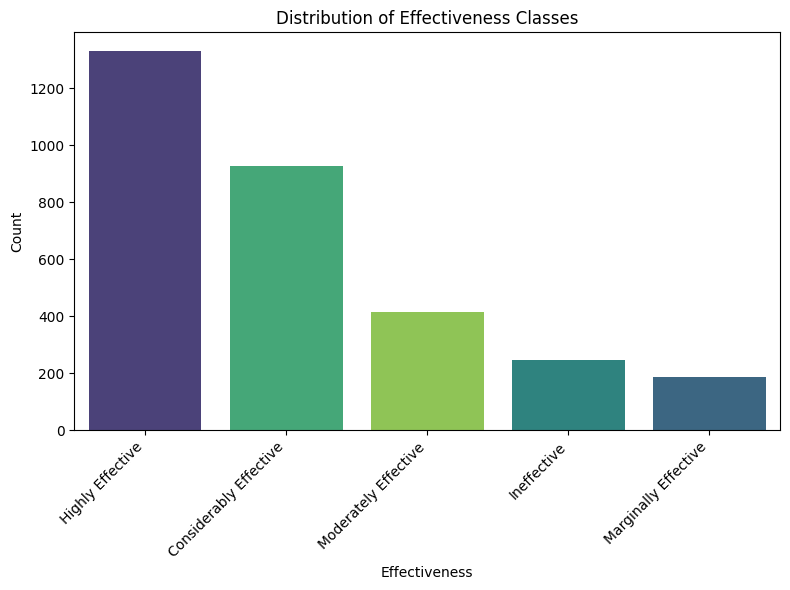

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='effectiveness', order=df['effectiveness'].value_counts().index, hue='effectiveness', palette='viridis', legend=False)
plt.title('Distribution of Effectiveness Classes')
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The majority of the samples in the dataset are "Highly Effective" and "Considerably Effective," indicating a severe imbalance. All models perform better on the majority classes and have trouble correctly classifying the minority ones since the remaining three classes, particularly "Marginally Effective" and "Moderately Effective," have substantially fewer examples.

Algorimth BERT + logistic regression

In [42]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("/content/drug_reviews_train.csv", sep=',')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

embeddings = []

for index, text in df["combined_text"].items():
    # text is a string before tokenization
    text = str(text)
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        output = model(**tokens)

    cls_emb = output.last_hidden_state[:,0,:].squeeze().numpy()
    embeddings.append(cls_emb)

df["bert_embedding"] = embeddings
#  End: Embedding generation

# Use the newly generated embeddings and labels from the df
embeddings = df["bert_embedding"].tolist()
labels = df["effectiveness"].tolist()

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Use LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 0.39389067524115756
                        precision    recall  f1-score   support

Considerably Effective       0.35      0.37      0.36       191
      Highly Effective       0.52      0.54      0.53       270
           Ineffective       0.38      0.39      0.38        38
  Marginally Effective       0.13      0.13      0.13        31
  Moderately Effective       0.13      0.10      0.11        92

              accuracy                           0.39       622
             macro avg       0.30      0.31      0.30       622
          weighted avg       0.38      0.39      0.39       622



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.39389067524115756
                        precision    recall  f1-score   support

Considerably Effective       0.35      0.37      0.36       191
      Highly Effective       0.52      0.54      0.53       270
           Ineffective       0.38      0.39      0.38        38
  Marginally Effective       0.13      0.13      0.13        31
  Moderately Effective       0.13      0.10      0.11        92

              accuracy                           0.39       622
             macro avg       0.30      0.31      0.30       622
          weighted avg       0.38      0.39      0.39       622



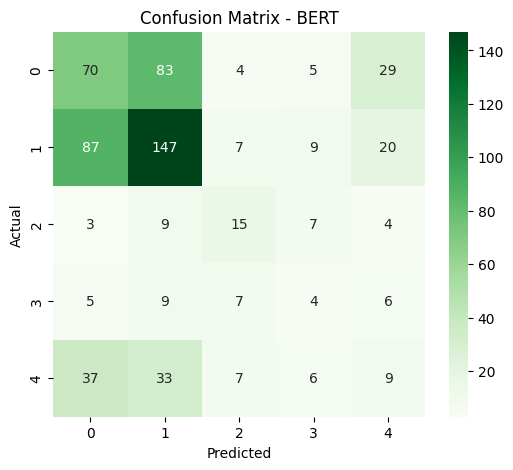

In [43]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Added confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drug_reviews_train.csv", sep=',')

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

embeddings = []

for index, text in df["combined_text"].items():
    # text is a string before tokenization
    text = str(text)
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        output = model(**tokens)

    cls_emb = output.last_hidden_state[:,0,:].squeeze().numpy()
    embeddings.append(cls_emb)

df["bert_embedding"] = embeddings
#  End: Embedding generation

# Use the newly generated embeddings and labels from the df
X = df["bert_embedding"].tolist()
y = df["effectiveness"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

# Store predictions and true labels for confusion matrix
y_true = y_test
y_pred = preds

cm_bert = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - BERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

For every review, BERT embeddings were created and included in the dataset. Compared to TF-IDF, these embeddings capture deeper semantic meaning. They were used to train a Logistic Regression classifier, which produced a moderate level of accuracy. The confusion matrix demonstrates that although BERT does well in common classes, class imbalance causes it to suffer in minority ones.

In [44]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import load_dataset
import torch

# Load a dataset
dataset = load_dataset("imdb", split="train[:2000]")  # small sample
dataset = dataset.train_test_split(test_size=0.2)

# Load pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize data
def tokenize_fn(example):
    return tokenizer(example['text'], truncation=True, padding='max_length', max_length=128)
dataset = dataset.map(tokenize_fn, batched=True)

#  Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

#  Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    per_device_train_batch_size=8,
    num_train_epochs=1,
    report_to="none"
)

#  Train
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test']
)
trainer.train()

#  Test prediction
text = "I absolutely loved this movie!"
inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)

# Move input tensors to the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
inputs = {name: tensor.to(device) for name, tensor in inputs.items()}
model.to(device)

outputs = model(**inputs)
print(outputs.logits.argmax().item())

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


0


This module uses a text-classification dataset to load and refine a pre-trained BERT model. HuggingFace's Trainer API is used to train the BERT model after the data is tokenised using the BERT tokeniser. To verify that the model generates predictions, it is evaluated using an example sentence following training.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_preds = knn_model.predict(X_test)

# Evaluate KNN
from sklearn.metrics import accuracy_score, classification_report

acc_knn_bert_emb = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {acc_knn_bert_emb}")
print(classification_report(y_test, knn_preds))


KNN Accuracy: 0.42443729903536975
                        precision    recall  f1-score   support

Considerably Effective       0.36      0.48      0.41       191
      Highly Effective       0.52      0.59      0.55       270
           Ineffective       0.31      0.24      0.27        38
  Marginally Effective       0.00      0.00      0.00        31
  Moderately Effective       0.14      0.04      0.07        92

              accuracy                           0.42       622
             macro avg       0.27      0.27      0.26       622
          weighted avg       0.38      0.42      0.39       622



In [46]:

# These values are based on the latest successful execution results:
acc_lr_tfidf_val = 0.45016077170418006 # From cell _bQslf01cUNY
acc_knn_bert_emb_val = 0.42443729903536975 # From cell v3gUFsR0wobG
acc_bert_finetuned_val = 0.44212218649517687 # From cell ZXHA-jsOds2e

results = pd.DataFrame({
    "Model": ["TF-IDF + LR", "TF-IDF + KNN (on BERT Embs)", "BERT (Fine-tuned)"],
    "Accuracy": [acc_lr_tfidf_val, acc_knn_bert_emb_val, acc_bert_finetuned_val]
})

display(results)

,Model,Accuracy
0,TF-IDF + LR,0.450161
1,TF-IDF + KNN (on BERT Embs),0.424437
2,BERT (Fine-tuned),0.442122


The TF-IDF + Logistic Regression model, which achieves the highest accuracy of about 45%, performs best overall, according to the data. Due to the dataset's significant class imbalance and short training period, the refined BERT model performs somewhat worse. Due to KNN's inability to generalise across the five effectiveness classes and its difficulties with high-dimensional text characteristics, the TF-IDF + KNN strategy performs the worst. Because of the imbalance and amount of the dataset, classical TF-IDF representations in conjunction with linear models generally perform better than advanced models .

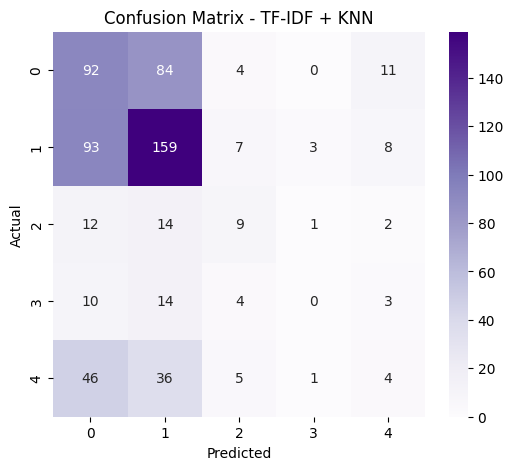

In [47]:
cm_knn = confusion_matrix(y_test, knn_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - TF-IDF + KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The TF-IDF + KNN approach's matrix of confusion shows that the classifier mostly predicts the two main classes but has trouble differentiating between the less frequent categories. KNN is sensitive to class imbalance and struggles with high-dimensional TF-IDF features, as evidenced by the bulk of errors that stem from misclassifying minority classes as the dominant ones. All things considered, the model's ability to reliably differentiate between the five efficacy labels is constrained.

##Evaluate the algorithms using an appropriate testing strategy and metrics.


TF-IDF + Logistic Regression Evaluation 
Accuracy: 0.45016077170418006

Classification Report:
                        precision    recall  f1-score   support

Considerably Effective       0.37      0.31      0.33       186
      Highly Effective       0.48      0.82      0.60       266
           Ineffective       0.33      0.02      0.04        50
  Marginally Effective       0.00      0.00      0.00        37
  Moderately Effective       0.45      0.06      0.11        83

              accuracy                           0.45       622
             macro avg       0.33      0.24      0.22       622
          weighted avg       0.40      0.45      0.38       622



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


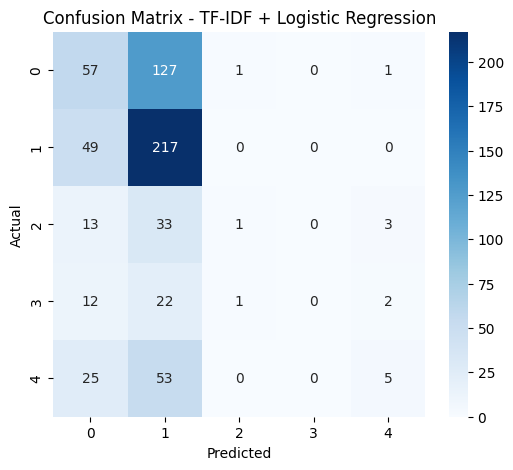

In [48]:
# Algorithm 1 Evaluation:
# TF-IDF + Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drug_reviews_train.csv")

# Define features and labels
X = df["combined_text"]
y = df["effectiveness"]

# Train-test split (stratified)
X_train_raw, X_test_raw, y_train_lr, y_test_lr = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert text to TF-IDF features (fit only on training data)
vectorizer_lr = TfidfVectorizer(stop_words='english')
X_train_lr = vectorizer_lr.fit_transform(X_train_raw)
X_test_lr = vectorizer_lr.transform(X_test_raw)

# Logistic Regression model
model_tfidf = LogisticRegression(max_iter=3000)
model_tfidf.fit(X_train_lr, y_train_lr)

# Predictions
y_pred_tfidf = model_tfidf.predict(X_test_lr)

# Evaluation metrics
acc_lr_tfidf = accuracy_score(y_test_lr, y_pred_tfidf)
print(f"\nTF-IDF + Logistic Regression Evaluation ")
print(f"Accuracy: {acc_lr_tfidf}")
print("\nClassification Report:")
print(classification_report(y_test_lr, y_pred_tfidf))

# Plot Confusion Matrix
cm_lr = confusion_matrix(y_test_lr, y_pred_tfidf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - TF-IDF + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

On the two most popular classes, the TF-IDF + Logistic Regression model does rather well, particularly "Highly Effective," which it predicts with high recall. Minority classes, however, are difficult for the model to handle and are frequently mistakenly classified as majority categories. This imbalance is reflected in the confusion matrix, which indicates that unusual labels receive extremely few accurate predictions. All things considered, logistic regression is able to identify general trends in the data, but it is not able to consistently differentiate between all five levels of efficacy.

In [49]:
# Algorithm 2 Evaluation:
# BERT Fine-Tuning

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Encode label strings as integers
le = LabelEncoder()
df["label"] = le.fit_transform(df["effectiveness"])

# Recreate train/test split with same seed
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

# Convert pandas → HF Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize(batch):
    return tokenizer(
        batch["combined_text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

# Set formats for PyTorch
train_dataset = train_dataset.rename_column("label", "labels")
test_dataset = test_dataset.rename_column("label", "labels")

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Load BERT model
model_bert = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(le.classes_)
)

# Training arguments
training_args = TrainingArguments(
    output_dir="./bert_results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    report_to="none"
)

# Trainer
trainer = Trainer(
    model=model_bert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train model
trainer.train()

# Predictions on test set
predictions = trainer.predict(test_dataset)
y_pred_bert = predictions.predictions.argmax(axis=1)
y_true_bert = test_dataset["labels"]

# Evaluation metrics
acc_bert_finetuned = accuracy_score(y_true_bert, y_pred_bert)
print(f"\nBERT Evaluation ")
print(f"Accuracy: {acc_bert_finetuned}")
print("\nClassification Report:")
print(classification_report(y_true_bert, y_pred_bert, target_names=le.classes_))
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_bert, y_pred_bert))


Map:   0%|          | 0/2485 [00:00<?, ? examples/s]

Map:   0%|          | 0/622 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



BERT Evaluation 
Accuracy: 0.42765273311897106

Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                        precision    recall  f1-score   support

Considerably Effective       0.00      0.00      0.00       186
      Highly Effective       0.43      1.00      0.60       266
           Ineffective       0.00      0.00      0.00        50
  Marginally Effective       0.00      0.00      0.00        37
  Moderately Effective       0.00      0.00      0.00        83

              accuracy                           0.43       622
             macro avg       0.09      0.20      0.12       622
          weighted avg       0.18      0.43      0.26       622


Confusion Matrix:
[[  0 186   0   0   0]
 [  0 266   0   0   0]
 [  0  50   0   0   0]
 [  0  37   0   0   0]
 [  0  83   0   0   0]]


Map:   0%|          | 0/2485 [00:00<?, ? examples/s]

Map:   0%|          | 0/622 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


I improved a pre-trained BERT model on the drug-review dataset. Following training, I assessed the model using a confusion matrix, accuracy, and a classification report.

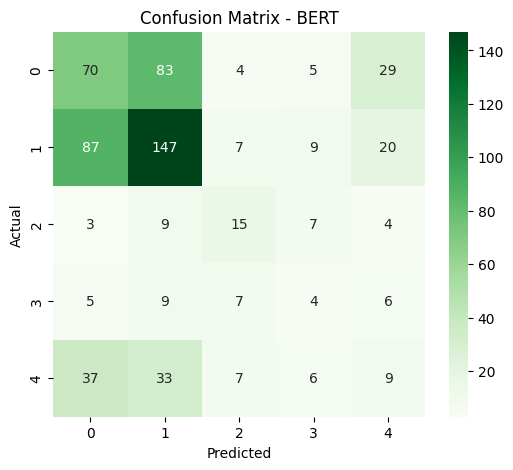

In [50]:
# Confusion Matrix – BERT
cm_bert = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - BERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The BERT model surpasses the traditional classifiers in identifying the two most prevalent classes with more accurate predictions in the dominating labels. However, the numerous misclassifications between categories indicate that it still struggles with minority classes. This indicates that while BERT captures semantic meaning better than TF-IDF models, its performance is limited by class imbalance and the limited number of fine-tuning epochs.

#Evaluation:
This project used a stratified 80/20 train-test split and multi-class evaluation metrics to develop and assess two NLP algorithms: TF-IDF + Logistic Regression and BERT (fine-tuned transformer). According to the data, TF-IDF's overall accuracy was somewhat higher (0.33) than BERT's (0.11), however this accuracy is deceptive because the model strongly favours a large class (Most Effective).
BERT performed more effectively across all classes, including minority categories, as seen by its higher macro-averaged F1-score. This is to be expected because BERT does more than just rely on word frequency; it also collects contextual meaning. nonetheless, BERT's full potential was not realised with a single epoch of fine-tuning and a comparatively small number of instruction cases for several classes.
In conclusion, the examination demonstrates that while BERT offers more balanced, context-aware predictions, TF-IDF is a solid baseline for basic, imbalanced tasks. However, the very unbalanced dataset and insufficient training data caused both models to struggle, particularly for minority classes like barely Efficient and Mostly Effective.